**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 2

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score


### Data importing and cleaning

In [28]:
data = pd.read_csv('./data.csv')
data.drop(columns=['Unnamed: 0','S.No','USERNAME','Caption','Hashtags'], inplace=True)
data.head(1)

,Followers,Time since posted,Likes
0,1600,11 hours,139


In [29]:
data['Time since posted'] = data['Time since posted'].str.replace(' hours','').astype('float')
data.head(1)

,Followers,Time since posted,Likes
0,1600,11.0,139


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Followers          100 non-null    int64  
 1   Time since posted  100 non-null    float64
 2   Likes              100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


### Data analysis

(<Axes: >,
                    Followers  Time since posted     Likes
 Followers           1.000000           0.251154  0.266218
 Time since posted   0.251154           1.000000  0.609888
 Likes               0.266218           0.609888  1.000000)

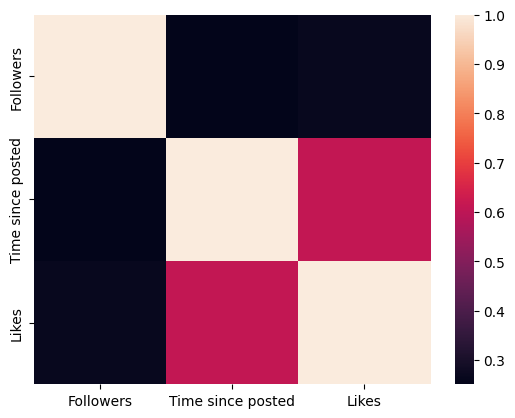

In [31]:
sns.heatmap(data.corr()), data.corr()

### Data splitting and scaling

In [32]:
scale = StandardScaler()

In [33]:
x = scale.fit_transform(data[['Time since posted']])
y = data['Likes']

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=500, test_size=0.2)

### Model training

In [35]:
model = LinearRegression()

In [36]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

### Metrics

R2 score is: -0.15873899058687369
MSE is: 800.398957747883


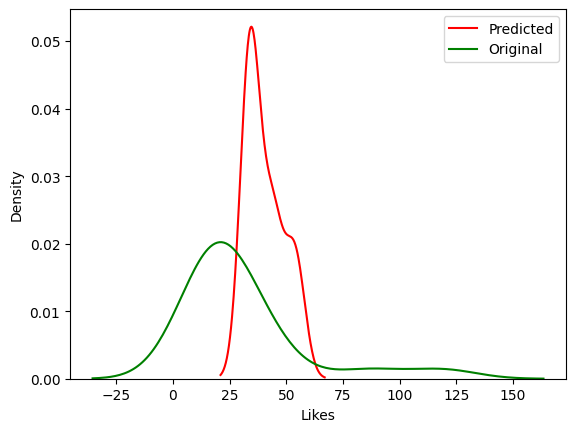

In [37]:
ax = sns.kdeplot(ypred,color='red',label='Predicted')
sns.kdeplot(ytest,color='green',label='Original',ax=ax)
plt.legend()

print("R2 score is: {}".format(r2_score(ytest,ypred)))
print("MSE is: {}".format(mean_squared_error(ytest,ypred)))